In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import argparse
from PIL import Image
from dcp import *
import matplotlib.pyplot as plt


In [114]:
im0 = Image.open("./data/tmp.png")
im = np.asarray(im0, dtype=np.float64)/255

In [118]:
dc = get_dark_channel(im, patch_size=(15,15))
A = get_atmos_light(im, dc, top_ratio=1e-3)
tilde_t = get_tilde_t(im, A)

In [121]:
t1 = soft_matting(im, tilde_t)

Time usedL: L--40.51, t--73.83, total--114.34


In [ ]:
t2 = guided_filter(im, tilde_t)

In [110]:
J1 = get_J(im, A=A, t=t1)
J2 = get_J(im, A=A, t=t2)

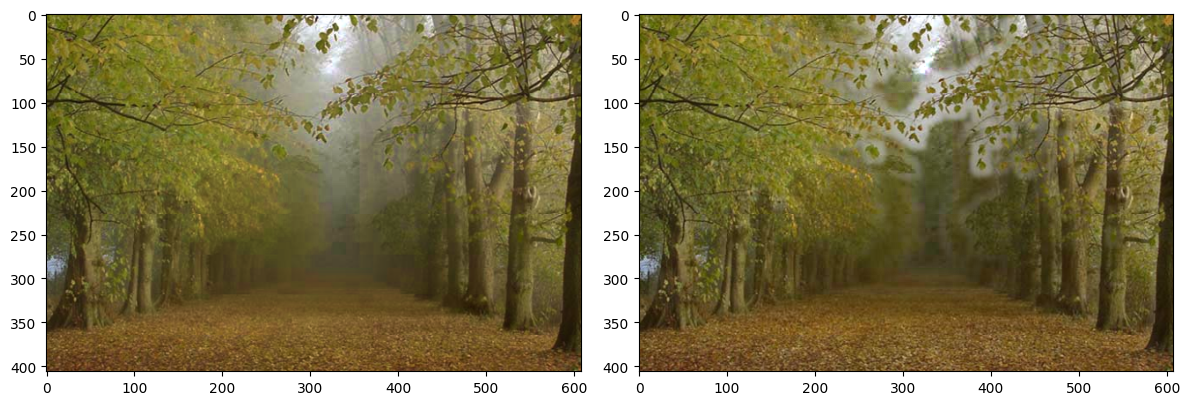

In [111]:
plt.figure(figsize=(12, 5), tight_layout=True)
plt.subplot(1, 2, 1)
plt.imshow(J1)

plt.subplot(1, 2, 2)
plt.imshow(J2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '$J$')

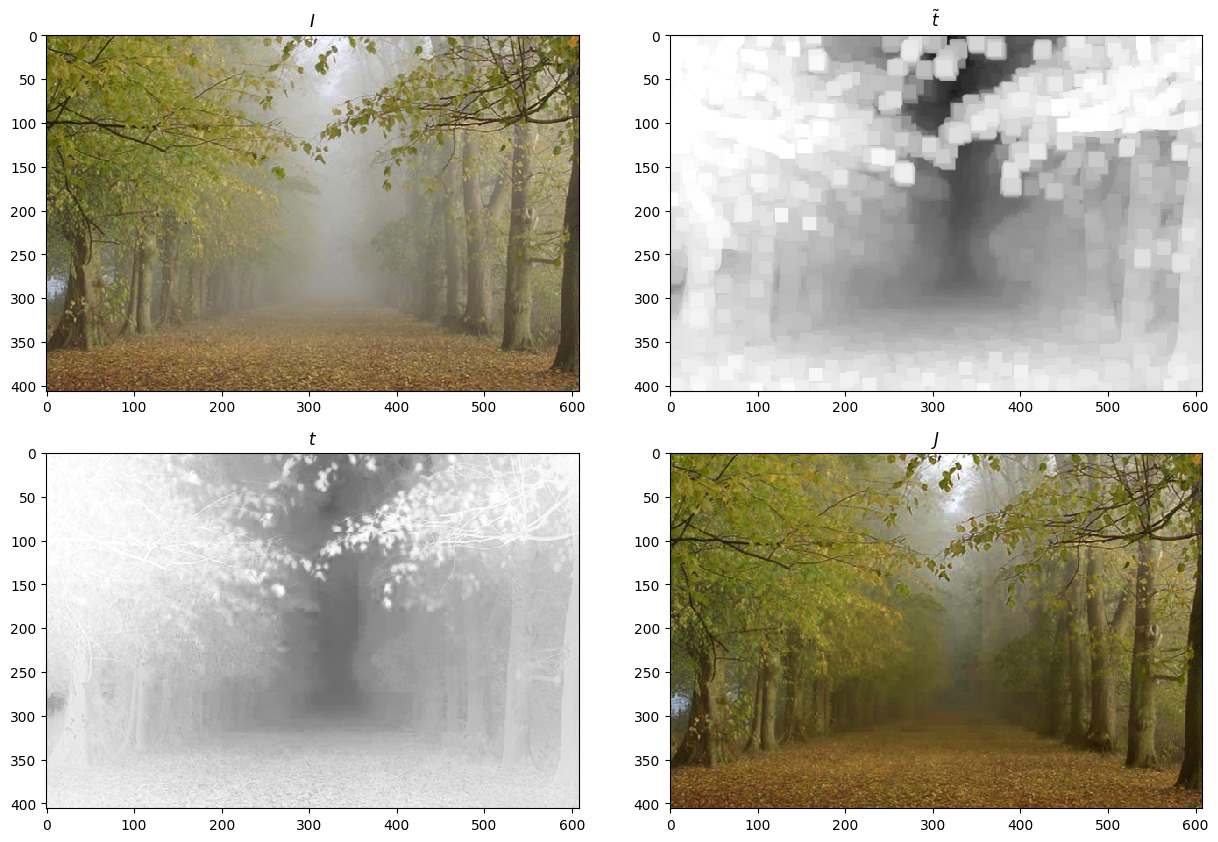

In [9]:
h, w = J.shape[:2]
fig,axs = plt.subplots(
    2, 2,  figsize=(w*2.1/100, h*2.1/100),
    tight_layout=True,
)
opt_f = {
"cmap": "gray",
"vmin": 0,
"vmax" : 1,
"interpolation": 'none'
}
axs[0][0].imshow(im, interpolation='none')
axs[0][0].set_title("$I$")
axs[0][1].imshow(tilde_t, **opt_f)
axs[0][1].set_title("$\\tilde{t}$")

axs[1][0].imshow(t, **opt_f)
axs[1][0].set_title("$t$")

axs[1][1].imshow(J, interpolation='none')
axs[1][1].set_title("$J$")

In [125]:
D = get_depth(t1)

In [128]:
D.max(), D.min()

(2.5819642613527054, -0.10339074054775753)

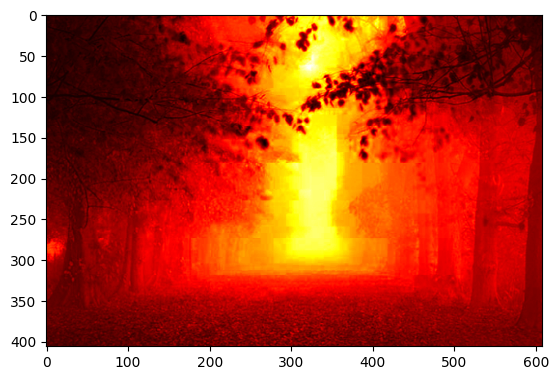

In [129]:
plt.imshow(D, cmap="hot")